# Subset Simulation Example 1
Author: Michael D. Shields
Date: May 23, 2018, Last modified by Dimitris Giovanis on 4/8/2019.

This example runs subset simulation with the component-wise modified Metropolis-Hastings algorithm for MCMC to estimate the probability of failure of a system with linear performance function and 2-dimensional standard unit normal random variables, $u_i$ given by:


$g(\textbf{U}) = -\frac{1}{\sqrt{d}}\sum_{i=1}^{d} u_i + \beta$


The probability of failure in this case is $P(F) ≈ 10^{−3}$ for $\beta$ = 3.0902

In [1]:
from UQpy.Reliability import SubsetSimulation
import matplotlib.pyplot as plt
import time
import numpy as np
from UQpy.RunModel import RunModel

Here, we use 1000 samples per subset and call the performance function using a Python script (provided) called 'pfn.py' that evaluates $g(U)$ as defined above. The conditional probabilities for each level are 

In [2]:
t = time.time()
x_ss = SubsetSimulation(dimension=2, nsamples_ss=1000, pdf_proposal_scale=1, pdf_target_type="marginal_pdf", 
                        pdf_target=['normal', 'normal'], pdf_target_params = [[0, 1], [0, 1]],
                            algorithm='MMH', model_script='pfn.py',model_object_name="RunPythonModel", p_cond=0.1)
t_run = time.time()-t
print("Probability of failure: {0}".format(x_ss.pf))
print("thresholds: {0}".format(x_ss.g_level))

UQpy: Running Subset Simulation....
Done!
Probability of failure: 0.0021700000000000005
thresholds: [1.6815631018158115, 0.54442096148040875, -0.29270739486192943]


# Plots

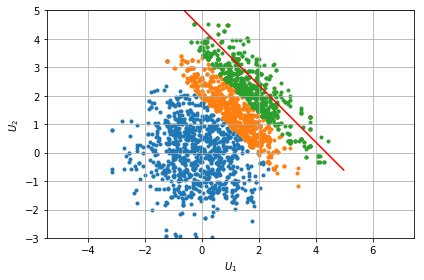

In [3]:
# Plot
dx, dy = 0.05, 0.05
y, x = np.mgrid[slice(-4, 5 + dy, dy),
                slice(-4, 5 + dx, dx)]
z = np.zeros_like(y)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        pq = np.array([y[i, j], x[i, j]]).reshape(1, -1)
        z[i, j] = RunModel(samples=pq.reshape(1, -1), model_script='pfn.py', model_object_name="RunPythonModel").qoi_list[0][0]
        
plt.figure() 
plt.contour(x, y, z,[0],colors='r')  # LSF
for j in range(len(x_ss.samples)):
    plt.scatter(x_ss.samples[j][:,0],x_ss.samples[j][:,1],marker='.')

plt.axis('equal')
plt.grid(True)
plt.xlabel(r'$U_1$')
plt.ylabel(r'$U_2$')
plt.xlim([-3, 5])
plt.ylim([-3, 5])
plt.tight_layout()
plt.show()